# 1st layer keys: 
 <KeysViewHDF5 ['burr_change', 'data', 'drill_force_feedback', 'voxels_removed']>
# 2nd layer keys: 
burr_change 
 layer contains <KeysViewHDF5 []>
data 
 layer contains <KeysViewHDF5 ['pose_main_camera', 'pose_mastoidectomy_drill', 'pose_mastoidectomy_volume', 'time']>
drill_force_feedback 
 layer contains <KeysViewHDF5 ['time_stamp', 'wrench']>
voxels_removed 
 layer contains <KeysViewHDF5 ['voxel_color', 'voxel_removed', 'voxel_time_stamp']>
# 3nd layer values: 
<HDF5 dataset "pose_main_camera": shape (1338, 7), type "<f8">
<HDF5 dataset "pose_mastoidectomy_drill": shape (1338, 7), type "<f8">
<HDF5 dataset "pose_mastoidectomy_volume": shape (1338, 7), type "<f8">
<HDF5 dataset "time": shape (1338,), type "<f8">
<HDF5 dataset "time_stamp": shape (214647,), type "<f8">
<HDF5 dataset "wrench": shape (214579, 6), type "<f8">
<HDF5 dataset "voxel_color": shape (41690, 5), type "<f8">
<HDF5 dataset "voxel_removed": shape (41690, 4), type "<f8">
<HDF5 dataset "voxel_tim

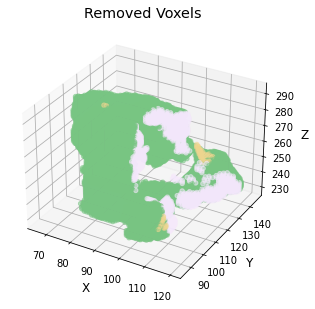

Number of Files  4


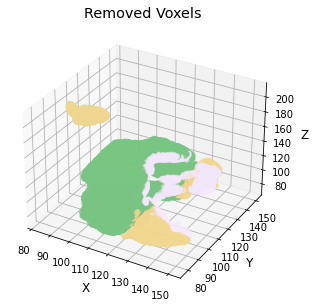

Number of Files  3


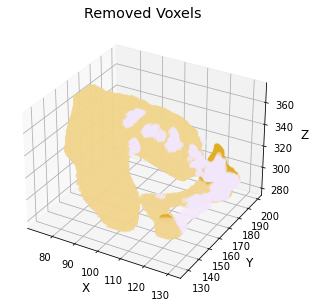

Number of Files  5


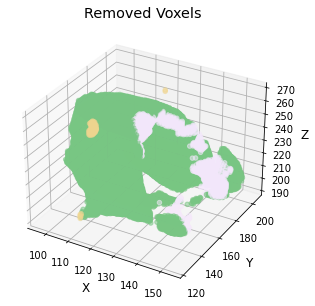

Number of Files  3


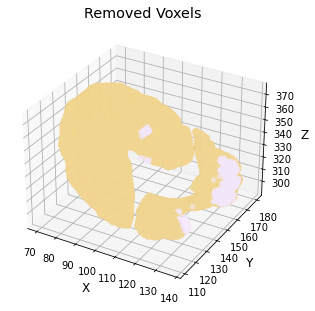

Number of Files  5


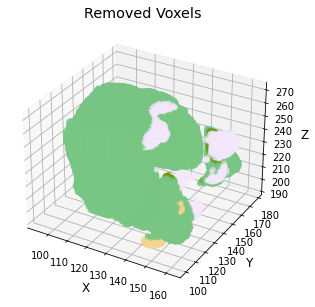

Number of Files  3


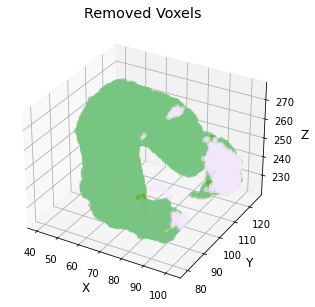

Number of Files  4


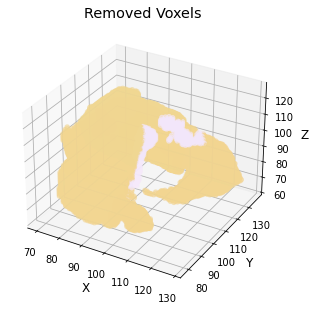

In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import h5py
import numpy as np

from mergehdf5 import DataMerger

params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (9, 5),
    "axes.labelsize": "large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "medium",
    "ytick.labelsize": "medium",
}

plt.rcParams.update(params)

def rgb_to_hex(r, g, b):
    return '#%02x%02x%02x' % (int(r), int(g), int(b))

files = []
files.append(['P0_L1_color', '/Users/wangyi/Downloads/Source_Data/cxoxe_P0_L1_color/2023-04-13 10:15:01'])
files.append(['P0_L3_color', '/Users/wangyi/Downloads/Source_Data/cxoxe_P0_L3_color/2023-04-13 10:51:15'])
# files.append(['P5', '/home/amunawa2/RedCap/Guidance/Participant_5/2022-11-10 13:14:55'])
files.append(['P2_L1_noncolor', '/Users/wangyi/Downloads/Source_Data/cxoxe_P2_L1_no_color/2023-04-13 10:23:43'])
files.append(['P2_L2_color', '/Users/wangyi/Downloads/Source_Data/cxoxe_P2_L2_color/2023-04-13 10:38:13'])
files.append(['P4_L1_noncolor', '/Users/wangyi/Downloads/Source_Data/cxoxe_P4_L1_no_color/2023-04-13 10:19:26'])
files.append(['P4_L2_color', '/Users/wangyi/Downloads/Source_Data/cxoxe_P4_L2_color/2023-04-13 10:08:49'])
files.append(['P7_L1_color', '/Users/wangyi/Downloads/Source_Data/cxoxe_P7_L1_color/2023-04-13 10:48:22'])
files.append(['P7_L3_noncolor', '/Users/wangyi/Downloads/Source_Data/cxoxe_P7_L3_no_color/2023-04-13 10:28:22'])
data_merger = DataMerger()

for lab, f in files:
    data = data_merger.get_merged_data(f, False)

    vrm = data['voxels_removed']['voxel_removed'][()]
    vcol = data['voxels_removed']['voxel_color'][()]

    colors = [None for _ in range(vcol.shape[0])]

    for i, c in enumerate(vcol):
        colors[i] = rgb_to_hex(c[1], c[2], c[3])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(vrm[:, 1], vrm[:, 2], vrm[:, 3], alpha=.3, c=colors)
    # ax.scatter([1, 2, 3], [5, 6, 4], [9, 5, 4], label="X")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # plt.legend(["Dura", "Tegmen"])
    plt.title('Removed Voxels')
    plt.show()